In [16]:
import cv2
import numpy as np

from MagicPoint.dataset.artificial_dataset import ArtificialDataset
from common.utils import plot_images, load_config

%load_ext autoreload
%autoreload 2
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
config = load_config('../configs/config_toy.yaml')
data_config = config['data']

dataset = ArtificialDataset('test', data_config)


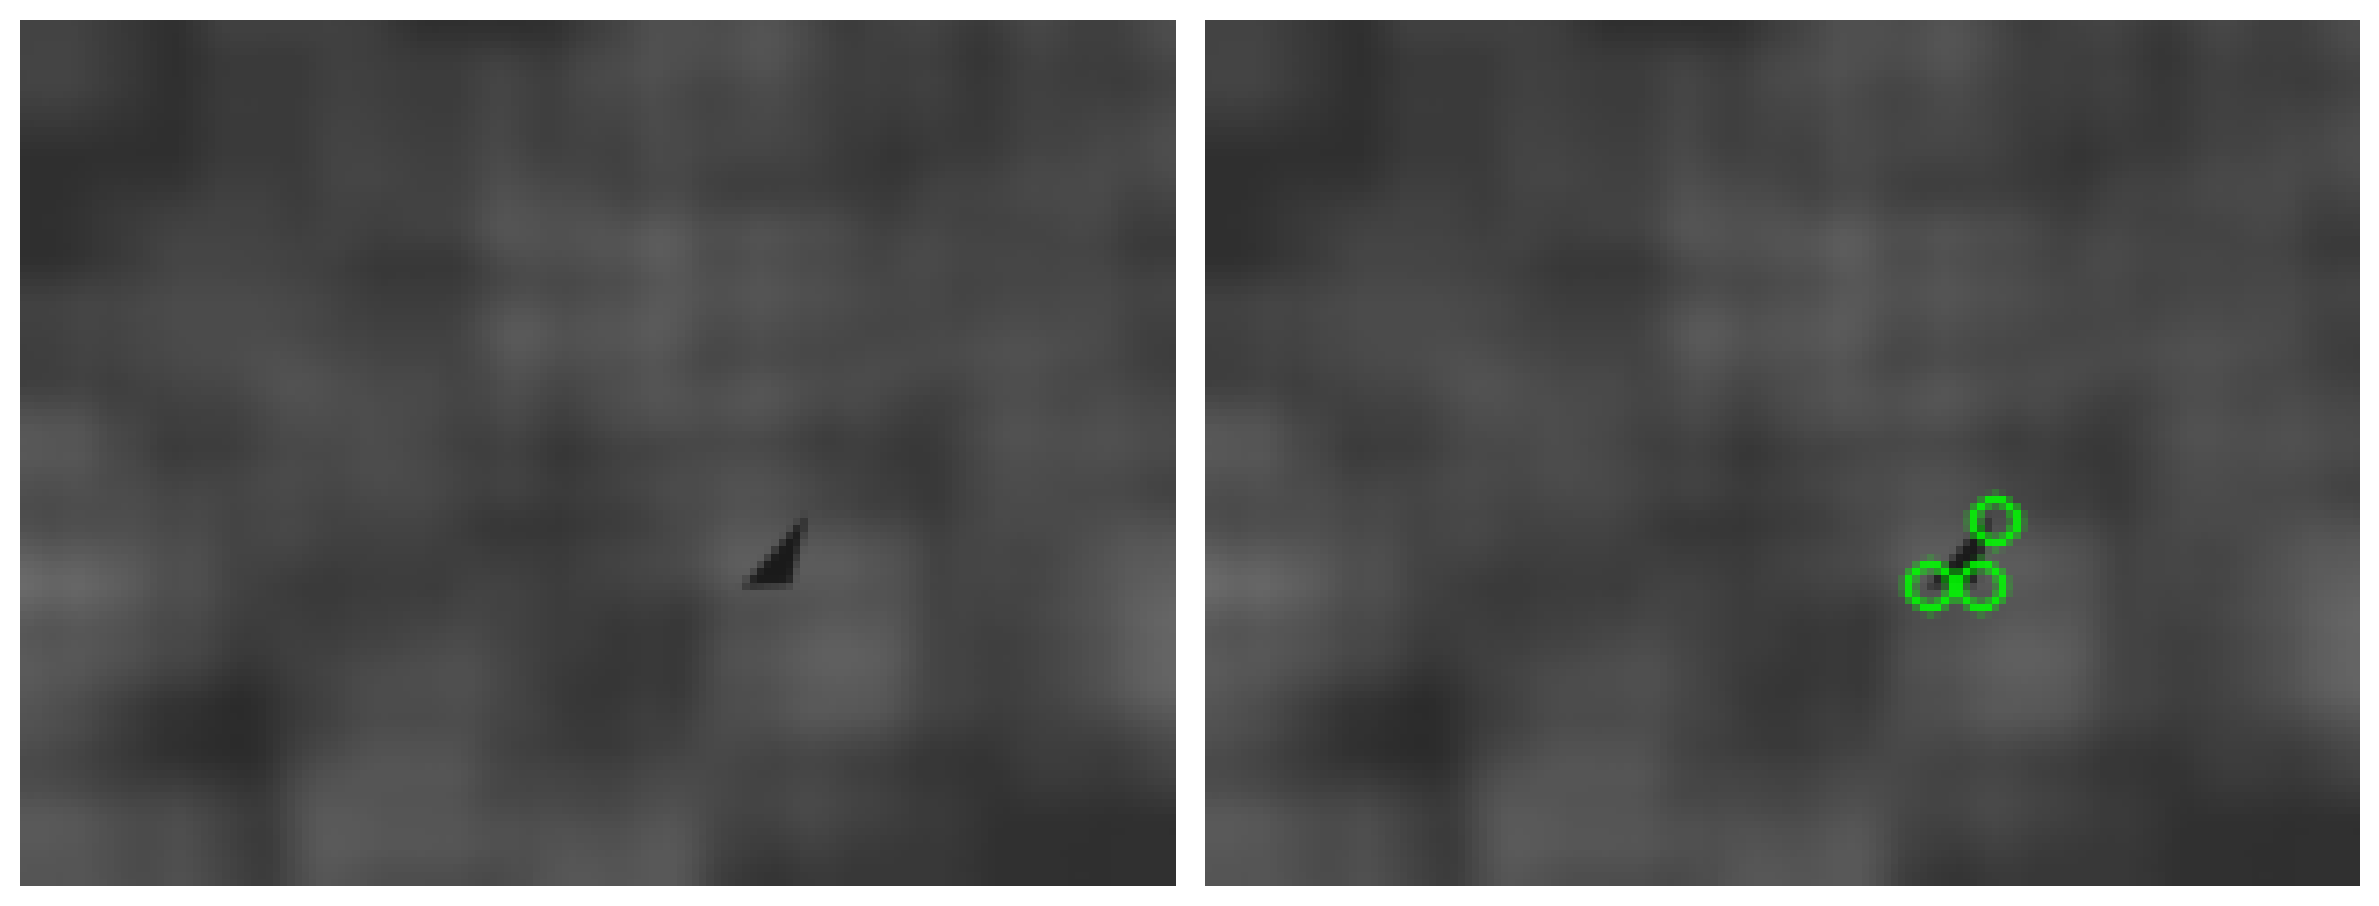

In [18]:
# Draw single image
      
index = np.random.randint(low=0, high=dataset.__len__())
image, keypoint_map = dataset.__getitem__(index)

formatted_image = image.transpose((1, 2, 0))

frames = [formatted_image]
        
# frame_points = [cv2.KeyPoint(c[1], c[0], 1) for c in points]
# frames.append(cv2.drawKeypoints(image[0].astype(np.uint8), frame_points, None, color=(0, 255, 0)))

frame_keypoints = [cv2.KeyPoint(c[1], c[0], 1) for c in np.stack(np.where(keypoint_map)).T]
frames.append(cv2.drawKeypoints((formatted_image * 255).astype(np.uint8), frame_keypoints, None, color=(0, 255, 0)))

plot_images(frames, dpi=200)


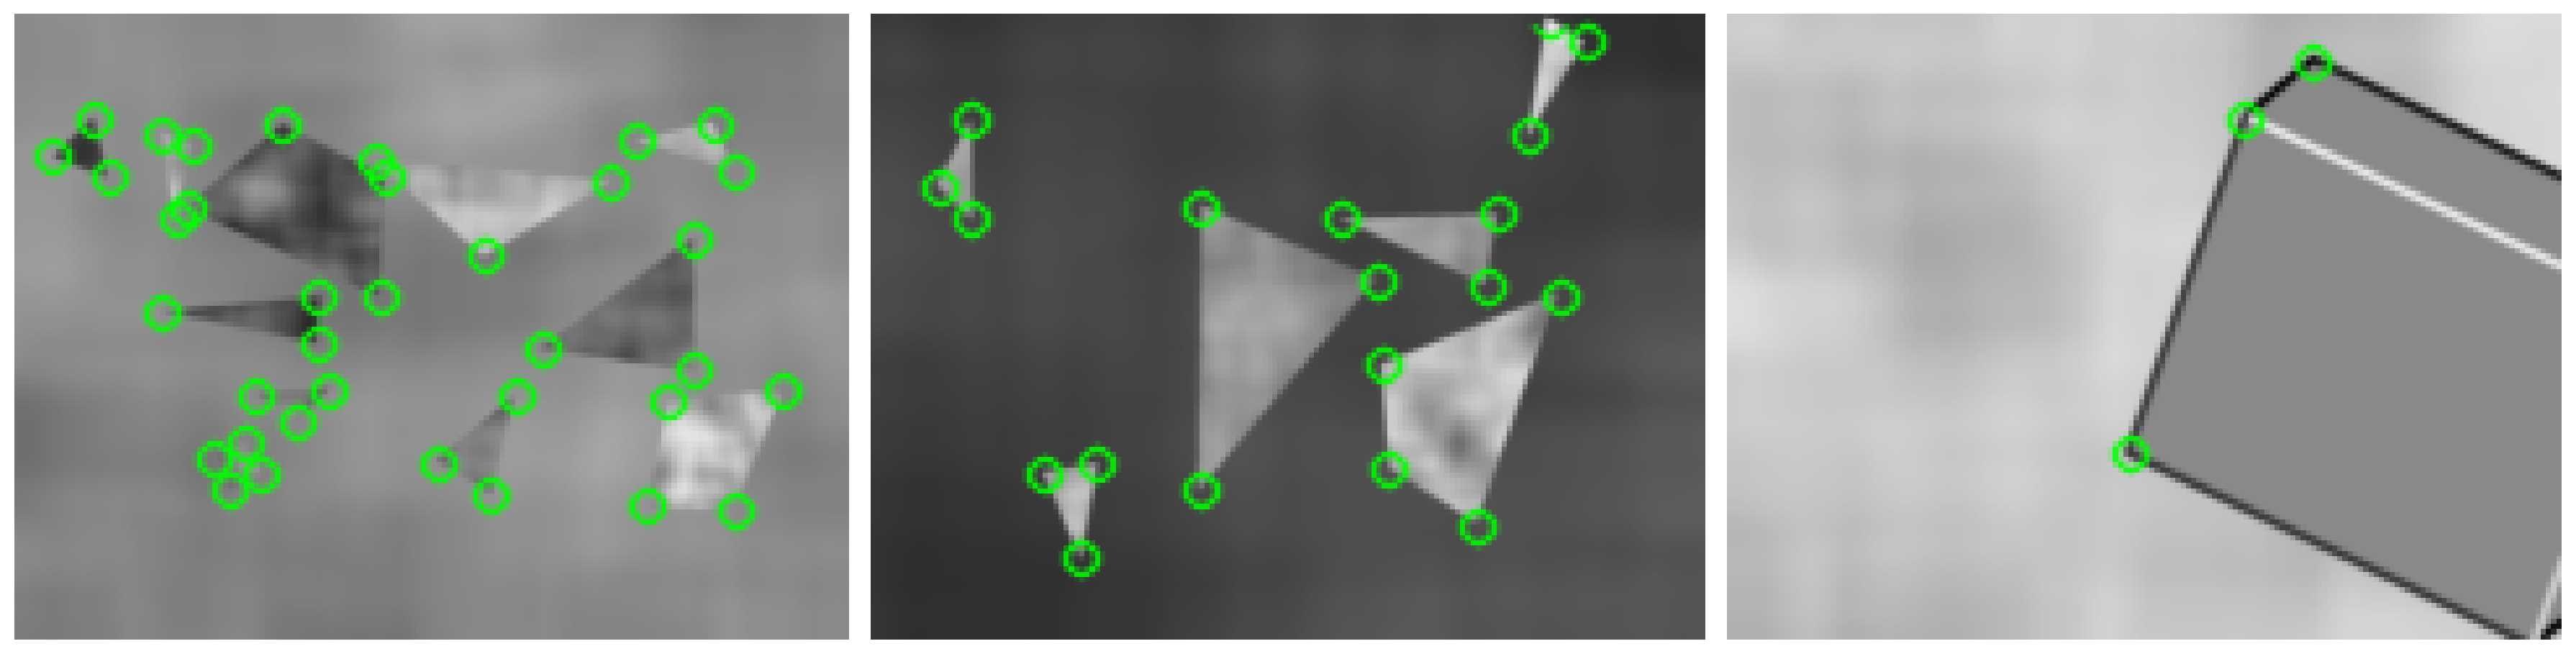

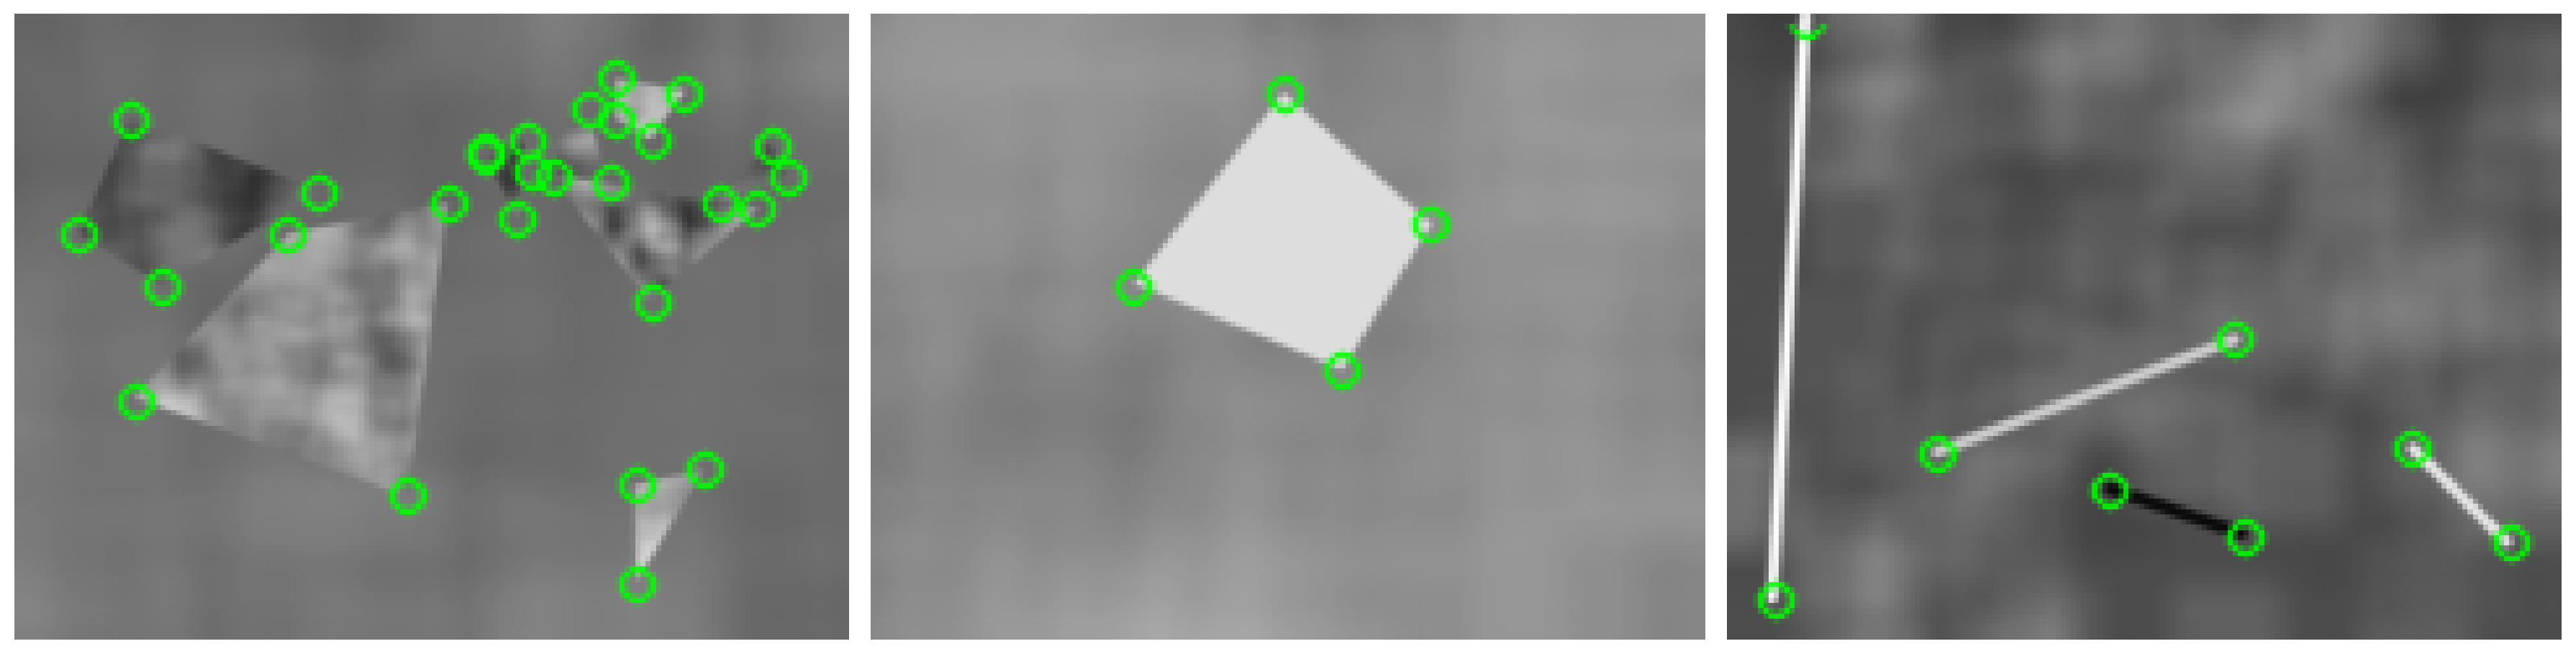

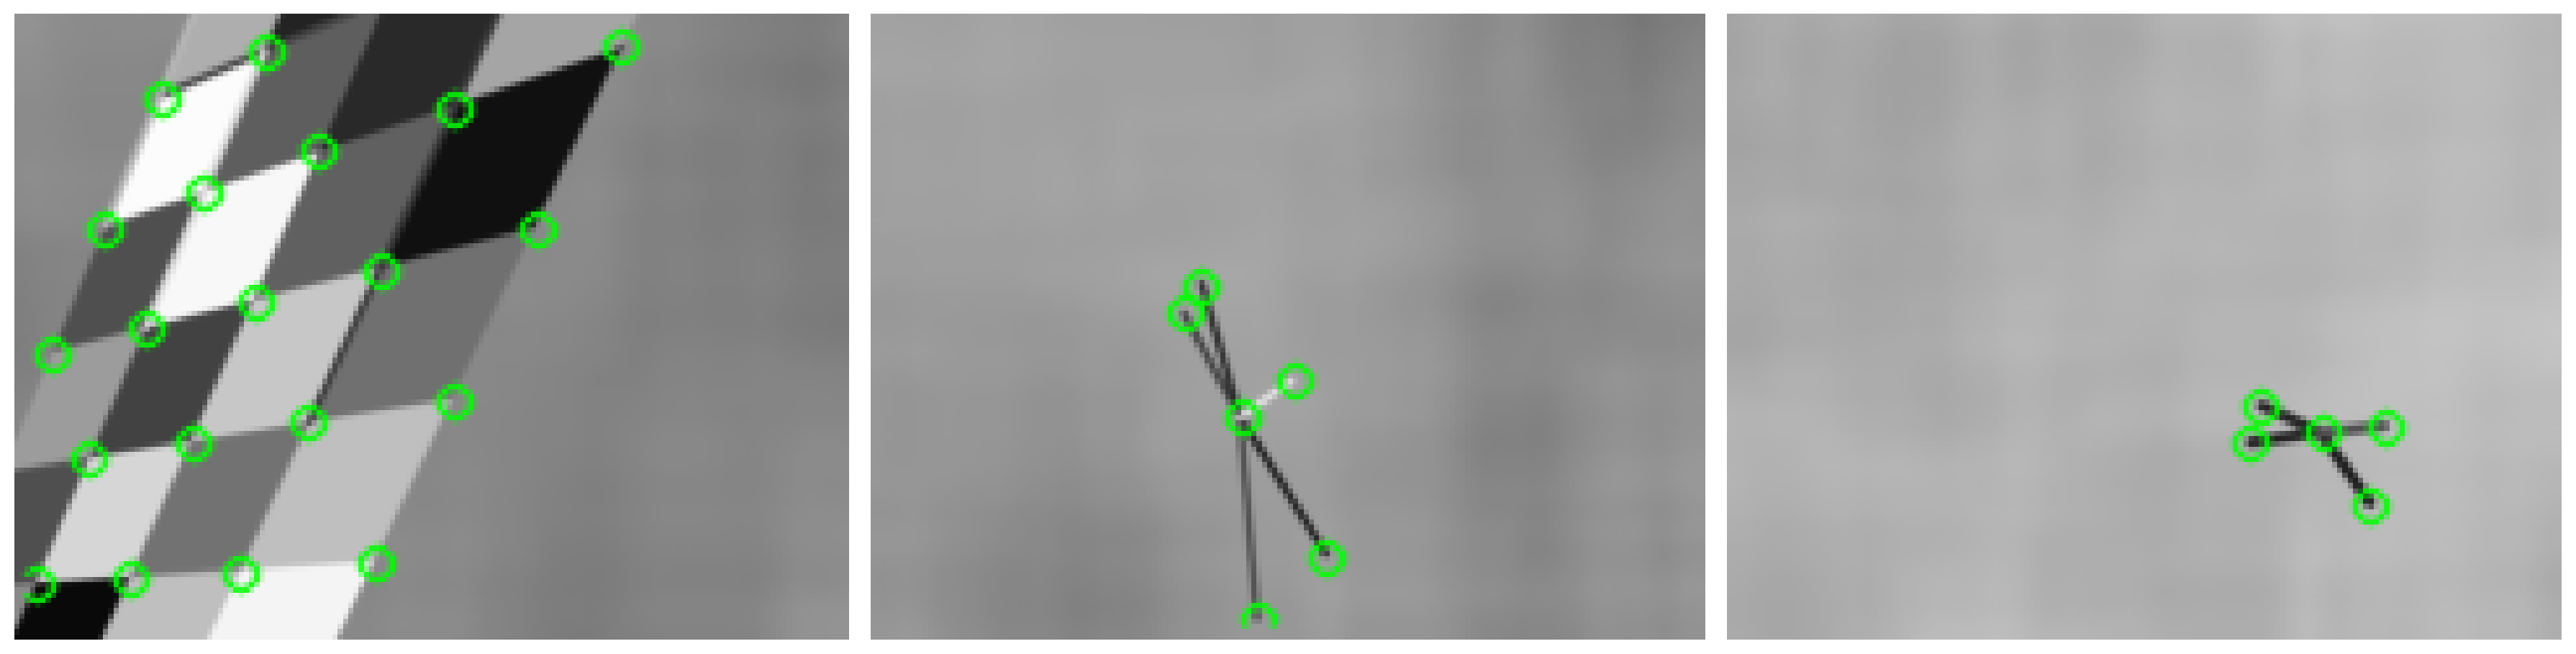

In [19]:
# Draw multiple images

rows = 3
columns = 3 

for _ in range(rows):
    frames = []
    for _ in range(columns):
        index = np.random.randint(low=0, high=dataset.__len__())
        image, keypoint_map = dataset.__getitem__(index)
        
        formatted_image = image.transpose((1, 2, 0))
        
        frame_keypoints = [cv2.KeyPoint(c[1], c[0], 1) for c in np.stack(np.where(keypoint_map)).T]
        frames.append(cv2.drawKeypoints((formatted_image * 255).astype(np.uint8), frame_keypoints, None, color=(0, 255, 0)))
        
    plot_images(frames, dpi=200)